### 잠과 다른 요인들과의 상관관계 학습, 예측
1. 모듈 임포트, 데이터 준비
    - 데이터 출처
        - https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset?select=Sleep_health_and_lifestyle_dataset.csv
2. 데이터 전처리
3. 학습 진행
    - 회귀 : 수면시간, 수면의 질, 스트레스 레벨
    - 분류 : 직업, 수면장애 여부, BMI
4. 성능 테스트
5. 예측

Dataset Columns:
\- Person ID: An identifier for each individual.
\- Gender: The gender of the person (Male/Female).
\- Age: The age of the person in years.
\- Occupation: The occupation or profession of the person.
\- Sleep Duration (hours): The number of hours the person sleeps per day.
\- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
\- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
\- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
\- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
\- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
\- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
\- Daily Steps: The number of steps the person takes per day.
\- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

(1) 모듈 임표트, 데이터 준비 <hr>

In [1]:
import pandas as pd
import numpy as np

In [2]:
filename = 'Sleep_health_and_lifestyle_dataset.csv'

sleep_healthDF = pd.read_csv(filename)
sleep_healthDF.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


(2) 데이터 전처리 <hr>

In [3]:
# 전체 데이터셋 요약정보 확인
sleep_healthDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


'Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder' 컬럼이 object 타입
'Sleep Disorder' 컬럼에만 NaN 값이 존재

In [4]:
# 중복값 확인 => 없음
sleep_healthDF.duplicated().sum()

0

In [5]:
# 고유값 종류 확인
sleep_healthDF.nunique()

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [6]:
# 결측치 확인
sleep_healthDF.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [7]:
# NaN, 'Sleep Apnea', 'Insomnia' 로 구성됨
sleep_healthDF['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [8]:
# 'Sleep Disorder' 컬럼에서 NaN은 정상(Normal)이라고 보면 되므로, 'Normal'으로 대체
sleep_healthDF['Sleep Disorder'] = sleep_healthDF['Sleep Disorder'].replace(np.nan, 'Normal')
sleep_healthDF['Sleep Disorder'].unique()

array(['Normal', 'Sleep Apnea', 'Insomnia'], dtype=object)

In [9]:
# 'Occupation' 은 총 11가지 직업으로 구성됨
# 'Software Engineer' 존재!
sleep_healthDF['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [126]:
sleep_healthDF['BMI Category'].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [11]:
sleep_healthDF['Blood Pressure'].unique()   # (수축기 혈압) / (이완기 혈압) 으로 구성되어 있음

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [128]:
## (수축기 혈압)은 'Maximal BP' 컬럼에, (이완기 혈압)은 'Minimal BP' 컬럼에 나눠서 저장

# '/'를 기준으로 값을 분리하여 새로운 DataFrame 생성
bpDF = sleep_healthDF['Blood Pressure'].str.split('/', expand=True)

# 분리된 값들을 기존 DataFrame에 새로운 열으로 저장
sleep_healthDF['Maximal BP'] = bpDF[0].astype('int')
sleep_healthDF['Minimal BP'] = bpDF[1].astype('int')

# 잘 들어갔는지 확인
sleep_healthDF[['Maximal BP', 'Minimal BP']].head(10)

,Maximal BP,Minimal BP
0,126,83
1,125,80
2,125,80
3,140,90
4,140,90
5,140,90
6,140,90
7,120,80
8,120,80
9,120,80


In [13]:
sleep_healthDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
 13  Maximal BP               374 non-null    int32  
 14  Minimal BP               3

In [14]:
sleep_healthDF.corr(numeric_only=True)[['Sleep Duration', 'Quality of Sleep']]

,Sleep Duration,Quality of Sleep
Person ID,0.296305,0.431612
Age,0.344709,0.473734
Sleep Duration,1.000000,0.883213
Quality of Sleep,0.883213,1.000000
Physical Activity Level,0.212360,0.192896
Stress Level,-0.811023,-0.898752
Heart Rate,-0.516455,-0.659865
Daily Steps,-0.039533,0.016791
Maximal BP,-0.180406,-0.121632
Minimal BP,-0.166570,-0.110151


In [131]:
# 데이터 시각화
import matplotlib.pyplot as plt
import koreanize_matplotlib

def plot_2d_from_DF(DF, col_x, col_y, by=None):
    values_to_check = {col_x, col_y}
    if all(value in set(sleep_healthDF.columns) for value in values_to_check):
        if by and (by in sleep_healthDF.columns):
            for value in sleep_healthDF[by].unique():
                subset = sleep_healthDF[sleep_healthDF[by] == value]
                plt.scatter(subset[col_x], subset[col_y], label=subset[by].iloc[0])
            plt.legend(title='Legend', bbox_to_anchor=(1, 1), loc='upper left')
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            # sleep_healthDF[[col_x, col_y, by]].plot(kind='scatter', x=col_x, y=col_y, 
            #                                         c=pd.factorize(sleep_healthDF[by])[0], cmap='viridis',
            #                                         colorbar=False, legend=True)
        else:
            sleep_healthDF[[col_x, col_y]].plot(kind='scatter', x=col_x, y=col_y)
        plt.title(f"\'{col_x}\'와의 상관관계")
        plt.show()
        print(f'unique values : {DF[[col_x, col_y]].drop_duplicates().shape[0]} 가지')
    else:
        print(f'{col_x} 또는 {col_y} 가 {DF}에 없음')


In [16]:
pd.factorize(sleep_healthDF['Sleep Disorder'])[1]

Index(['Normal', 'Sleep Apnea', 'Insomnia'], dtype='object')

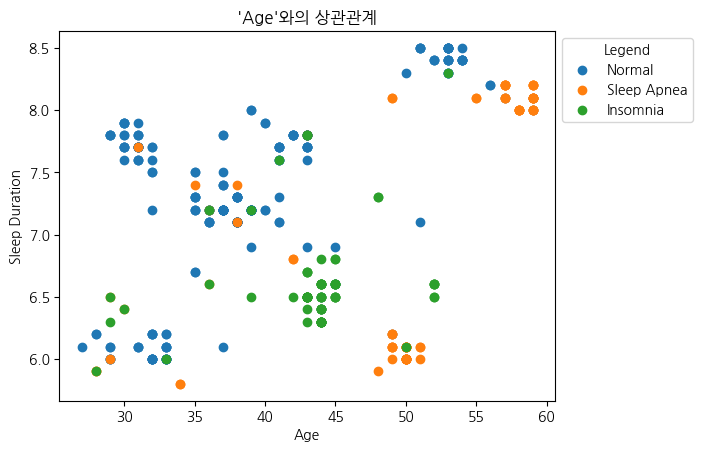

unique values : 103 가지


In [132]:
plot_2d_from_DF(sleep_healthDF, 'Age', 'Sleep Duration', 'Sleep Disorder')    # 나이와의 상관관계

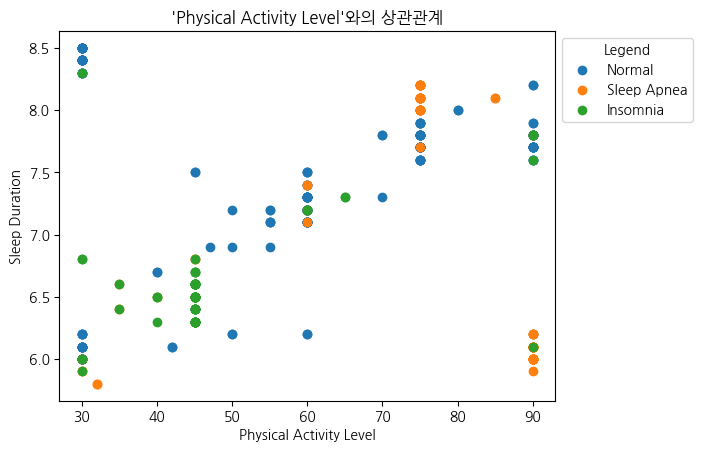

unique values : 56 가지


In [133]:
plot_2d_from_DF(sleep_healthDF, 'Physical Activity Level', 'Sleep Duration', 'Sleep Disorder')    # 신체활동과의 관계

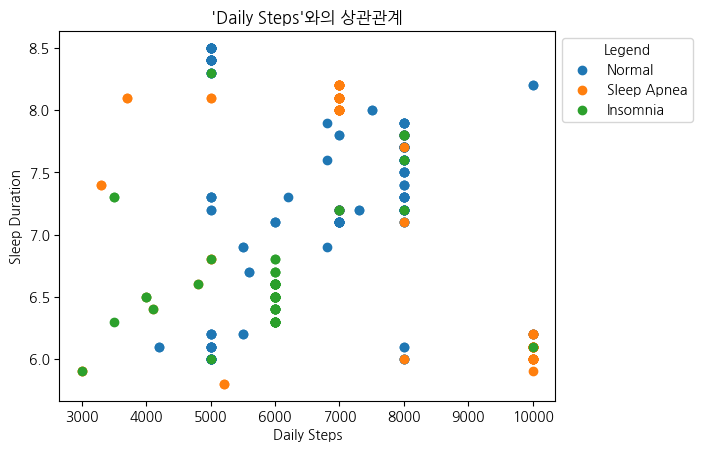

unique values : 58 가지


In [134]:
plot_2d_from_DF(sleep_healthDF, 'Daily Steps', 'Sleep Duration', 'Sleep Disorder')    # 걸음수와의 관계

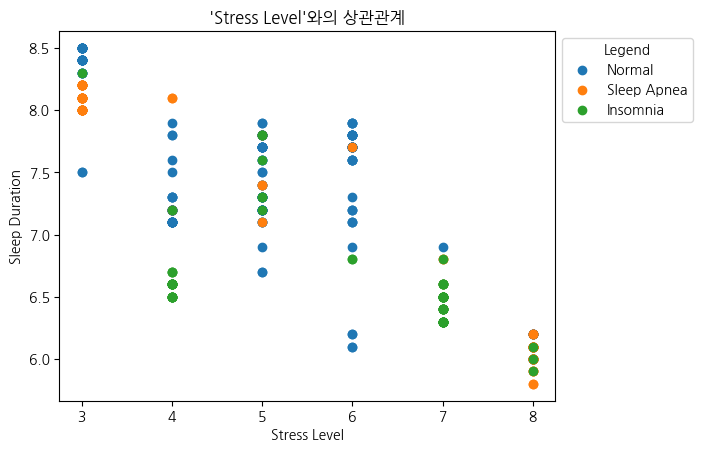

unique values : 51 가지


In [135]:
plot_2d_from_DF(sleep_healthDF, 'Stress Level', 'Sleep Duration', 'Sleep Disorder')   # 스트레스 레벨과의 상관관계

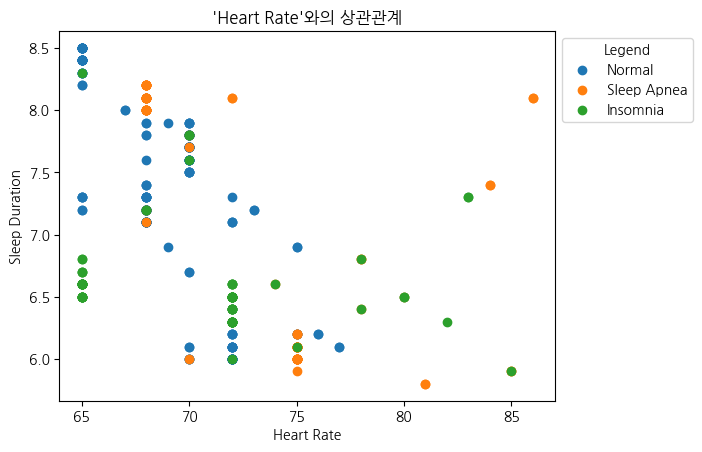

unique values : 59 가지


In [136]:
plot_2d_from_DF(sleep_healthDF, 'Heart Rate', 'Sleep Duration', 'Sleep Disorder')     # 심박수와의 상관관계

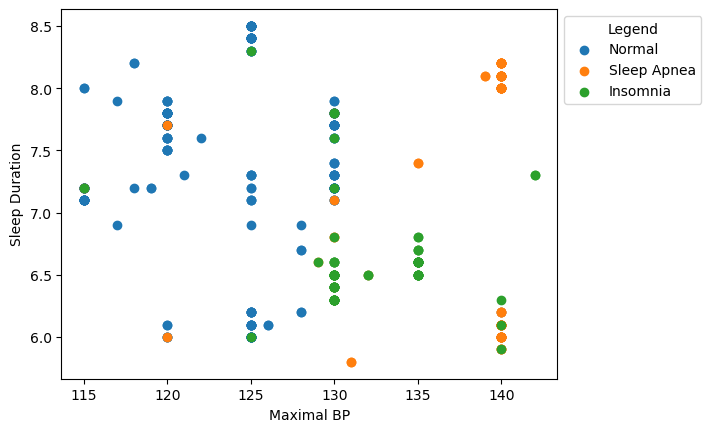

unique values : 62 가지


In [21]:
plot_2d_from_DF(sleep_healthDF, 'Maximal BP', 'Sleep Duration', 'Sleep Disorder')     # 수축기혈압과의 상관관계

In [190]:
featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level']]
# featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Daily Steps']]
targetSR = sleep_healthDF['Sleep Duration']
# targetSR = sleep_healthDF['Quality of Sleep']
featureDF.shape, targetSR.shape

((374, 4), (374,))

(3) 학습 & 평가

In [137]:
import joblib
import os

def save_model(model, model_name):
    # 모델 저장하는 함수
    model_dir = 'model/'
    model_filename = model_dir + f'{model_name}.pkl'
    
    # 저장 폴더 존재여부 확인 후 저장
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    joblib.dump(model, model_filename)

In [192]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def print_3_metrics(y_test, y_pred):
    print(f'{"[mean_absolute_error]":21} : {mean_absolute_error(y_test, y_pred)}')
    print(f'{"[mean_squared_error]":21} : {mean_squared_error(y_test, y_pred)}')
    print(f'{"[r2_score]":21} : {r2_score(y_test, y_pred)}')

(3-1) 스케일링 스킵했을 때

In [193]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((299, 4), (299,), (75, 4), (75,))

In [195]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor()
knn_model.fit(x_train, y_train)

train_score = knn_model.score(x_train, y_train)
test_score = knn_model.score(x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9355095796337053 test_score : 0.9297455780569085


In [196]:
y_pred = knn_model.predict(x_test)
print_3_metrics(y_test, y_pred)

[mean_absolute_error] : 0.10240000000000003
[mean_squared_error]  : 0.046773333333333306
[r2_score]            : 0.9297455780569085


In [198]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

train_score = lr_model.score(x_train, y_train)
test_score = lr_model.score(x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.6583328503669823 test_score : 0.730157165895631


In [199]:
y_pred = lr_model.predict(x_test)
print_3_metrics(y_test, y_pred)

[mean_absolute_error] : 0.3114955249936123
[mean_squared_error]  : 0.1796534435568885
[r2_score]            : 0.730157165895631


In [200]:
from sklearn.svm import SVR

svr_model = SVR()
svr_model.fit(x_train, y_train)

train_score = svr_model.score(x_train, y_train)
test_score = svr_model.score(x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.11067917215089584 test_score : 0.1967568114195415


In [201]:
y_pred = svr_model.predict(x_test)
print_3_metrics(y_test, y_pred)

[mean_absolute_error] : 0.5770281394221214
[mean_squared_error]  : 0.5347757531566708
[r2_score]            : 0.1967568114195415


In [202]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

train_score = rf_model.score(x_train, y_train)
test_score = rf_model.score(x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.990830031640942 test_score : 0.9779100252438788


In [203]:
y_pred = rf_model.predict(x_test)
print_3_metrics(y_test, y_pred)

[mean_absolute_error] : 0.0724550987044702
[mean_squared_error]  : 0.014706857220032668
[r2_score]            : 0.9779100252438788


In [211]:
featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level']]
# featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Daily Steps']]
targetDF = sleep_healthDF[['Sleep Duration', 'Quality of Sleep']]
featureDF.shape, targetDF.shape

((374, 4), (374, 2))

In [212]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(featureDF, targetDF, test_size=0.2, random_state=42)
x_train2.shape, y_train2.shape, x_test2.shape, y_test2.shape

((299, 4), (299, 2), (75, 4), (75, 2))

In [213]:
from sklearn.multioutput import MultiOutputRegressor

multi_output_model = MultiOutputRegressor(RandomForestRegressor())
multi_output_model.fit(x_train2, y_train2)

train_score = multi_output_model.score(x_train2, y_train2)
test_score = multi_output_model.score(x_test2, y_test2)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9951474748083544 test_score : 0.9879945422077318


In [105]:
# 내 데이터 : [25, 5, 80, 40]
# 예시 1) 33, 3, 64, 51 => 5시간
# 예시 2) 24, 5, 60, 120 => 8시간
# x_input = pd.DataFrame({'Age': [25], 'Stress Level': [5], 'Heart Rate': [80], 'Physical Activity Level': [40]})
x_input = pd.DataFrame({'Age': [25], 'Stress Level': [5], 'Heart Rate': [80], 'Daily Steps': [5700]})
x_input

,Age,Stress Level,Heart Rate,Daily Steps
0,25,5,80,5700


In [214]:
# 내 데이터의 답 : [6.81(6시간 49분), 8(수면의 질)]
multi_output_model.predict(
    pd.DataFrame({'Age': [25], 'Stress Level': [5], 
                  'Heart Rate': [80], 'Physical Activity Level': [40]}))

array([[6.714, 7.22 ]])

In [107]:
sleep_healthDF[['Sleep Duration', 'Quality of Sleep']].describe()

,Sleep Duration,Quality of Sleep
count,374.000000,374.000000
mean,7.132086,7.312834
std,0.795657,1.196956
min,5.800000,4.000000
25%,6.400000,6.000000
50%,7.200000,7.000000
75%,7.800000,8.000000
max,8.500000,9.000000


(3-2) 스케일링 하면

In [108]:
featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Physical Activity Level']]
# featureDF = sleep_healthDF[['Age', 'Stress Level', 'Heart Rate', 'Daily Steps']]
targetSR = sleep_healthDF['Sleep Duration']
featureDF.shape, targetSR.shape

((374, 4), (374,))

In [109]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((299, 4), (299,), (75, 4), (75,))

In [110]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = StandardScaler()
scaler.fit(featureDF)

scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [111]:
scaled_x_train

array([[ 0.09415288,  0.91130603,  0.44410682, -0.50555116],
       [-1.06037748,  1.47559156,  0.44410682, -1.12445832],
       [-0.82947141, -0.21726501, -0.04013793,  0.73226314],
       ...,
       [ 0.78687109,  1.47559156,  1.17047394,  1.97007745],
       [ 1.71049537, -1.34583606, -0.52438269,  0.11335599],
       [-0.71401837, -0.78155054, -0.52438269,  0.11335599]])

In [112]:
def print_3_scaler_scores(model, x_train, y_train, x_test, y_test):
    scaler_list = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    for scaler in scaler_list:
        scaler.fit(x_train)
        scaled_x_train = scaler.transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        
        model.fit(scaled_x_train, y_train)
        train_score = model.score(scaled_x_train, y_train)
        test_score = model.score(scaled_x_test, y_test)
        print(f'{str(type(scaler)).split(".")[-1][:-2]}')
        print(f'train_score : {train_score} test_score : {test_score}')

In [113]:
print_3_scaler_scores(KNeighborsRegressor(), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.9660379085410792 test_score : 0.9672680082030248
MinMaxScaler
train_score : 0.9703565501913906 test_score : 0.956902076390669
RobustScaler
train_score : 0.9635667217896515 test_score : 0.9652973596513714


In [114]:
knn_model = KNeighborsRegressor()
knn_model.fit(scaled_x_train, y_train)

train_score = knn_model.score(scaled_x_train, y_train)
test_score = knn_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9668666733555317 test_score : 0.9672680082030248


In [115]:
print_3_scaler_scores(LinearRegression(), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.6583328503669821 test_score : 0.7301571658956634
MinMaxScaler
train_score : 0.6583328503669823 test_score : 0.7301571658956634
RobustScaler
train_score : 0.6583328503669822 test_score : 0.7301571658956634


In [116]:
lr_model = LinearRegression()
lr_model.fit(scaled_x_train, y_train)

train_score = lr_model.score(scaled_x_train, y_train)
test_score = lr_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.6583328503669822 test_score : 0.7301571658956634


In [117]:
print_3_scaler_scores(SVR(), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.9582145628799976 test_score : 0.9520490091964333
MinMaxScaler
train_score : 0.9585592431122689 test_score : 0.9464172978696596
RobustScaler
train_score : 0.9514243830177599 test_score : 0.9506827283081267


In [118]:
svr_model = SVR()
svr_model.fit(scaled_x_train, y_train)

train_score = svr_model.score(scaled_x_train, y_train)
test_score = svr_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9583564522792178 test_score : 0.9520069303278003


In [119]:
print_3_scaler_scores(RandomForestRegressor(), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.9913563289267429 test_score : 0.9785451315958057
MinMaxScaler
train_score : 0.9904445979194741 test_score : 0.973168335186562
RobustScaler
train_score : 0.9909594413547109 test_score : 0.9755475089600176


In [120]:
rf_model = RandomForestRegressor()
rf_model.fit(scaled_x_train, y_train)

train_score = rf_model.score(scaled_x_train, y_train)
test_score = rf_model.score(scaled_x_test, y_test)
print(f'train_score : {train_score} test_score : {test_score}')

train_score : 0.9914184877237341 test_score : 0.9775903747359008


(3-3) 스케일링 + 전처리

In [52]:
# 이상치 제거 예시 (train data)
condition = np.logical_and(np.all(scaled_x_train >= -2, axis=1), np.all(scaled_x_train <= 2, axis=1))
result = scaled_x_train[~condition]
print(f'result : \n {result}')

result : 
 [[-1.52218962  0.91130603  2.38108582 -0.92155851]
 [-1.52218962  0.91130603  2.38108582 -0.92155851]
 [-1.52218962  0.91130603  2.86533057 -0.92155851]
 [-0.94492444  1.47559156  2.6232082  -1.3061196 ]
 [-0.36765927  0.91130603  2.38108582 -0.92155851]
 [ 0.67141805 -0.21726501  3.10745295  0.28019492]
 [ 0.78687109 -1.34583606  3.83382008  1.24159766]
 [-1.63764266  1.47559156  3.5916977  -1.40225988]
 [-0.94492444  1.47559156  2.6232082  -1.3061196 ]
 [ 0.67141805 -0.21726501  3.10745295  0.28019492]
 [ 0.78687109 -1.34583606  3.83382008  1.24159766]]


In [53]:
y_train[~condition]

16     6.5
18     6.5
6      6.3
81     5.8
147    6.5
266    7.3
277    8.1
4      5.9
80     5.8
264    7.3
276    8.1
Name: Sleep Duration, dtype: float64

In [121]:
def print_3_scaler_scores_without_outliers(model, x_train, y_train, x_test, y_test):
    scaler_list = [StandardScaler(), RobustScaler()]
    
    for scaler in scaler_list:
        scaler.fit(x_train)
        scaled_x_train = scaler.transform(x_train)
        scaled_x_test = scaler.transform(x_test)
        
        # -2 ~ 2 사이의 값만 사용 [이상치 판단 척도]
        train_condition = np.logical_and(np.all(scaled_x_train >= -3, axis=1), np.all(scaled_x_train <= 3, axis=1))
        test_condition = np.logical_and(np.all(scaled_x_test >= -3, axis=1), np.all(scaled_x_test <= 3, axis=1))
        
        model.fit(scaled_x_train[train_condition], y_train[train_condition])
        train_score = model.score(scaled_x_train[train_condition], y_train[train_condition])
        test_score = model.score(scaled_x_test[test_condition], y_test[test_condition])
        print(f'{str(type(scaler)).split(".")[-1][:-2]:15} & No_outliers')
        print(f'train_score : {train_score} test_score : {test_score}')

In [122]:
print_3_scaler_scores_without_outliers(KNeighborsRegressor(), x_train, y_train, x_test, y_test)

StandardScaler  & No_outliers
train_score : 0.97139594466655 test_score : 0.9786284640113986
RobustScaler    & No_outliers
train_score : 0.9681156025791167 test_score : 0.9786964720813703


In [123]:
print_3_scaler_scores_without_outliers(LinearRegression(), x_train, y_train, x_test, y_test)

StandardScaler  & No_outliers
train_score : 0.6526252809129495 test_score : 0.7149155162420346
RobustScaler    & No_outliers
train_score : 0.6526252809129494 test_score : 0.7149155162420346


In [124]:
print_3_scaler_scores_without_outliers(SVR(), x_train, y_train, x_test, y_test)

StandardScaler  & No_outliers
train_score : 0.960063490430572 test_score : 0.9628546299176646
RobustScaler    & No_outliers
train_score : 0.955816063661358 test_score : 0.9621206269179036


In [125]:
print_3_scaler_scores_without_outliers(RandomForestRegressor(), x_train, y_train, x_test, y_test)

StandardScaler  & No_outliers
train_score : 0.9905715661668487 test_score : 0.9812767999902775
RobustScaler    & No_outliers
train_score : 0.9908616151622395 test_score : 0.9842691694509019


이상치 판단 척도를 (-2 ~ 2) 로 했을 때 더 점수가 좋은 것 : 
- SVR  

이상치 판단 척도를 (-3 ~ 3) 로 했을 때 더 점수가 좋은 것 : 
- KNeighborsRegressor
- LinearRegression
- RandomForestRegressor

In [59]:
from sklearn.linear_model import Ridge
print_3_scaler_scores(Ridge(alpha=1.0), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.6774657858595171 test_score : 0.74347230671155
MinMaxScaler
train_score : 0.6765665466452939 test_score : 0.7425077052486435
RobustScaler
train_score : 0.6773472945149412 test_score : 0.7434167541134741


In [60]:
from sklearn.linear_model import Lasso
print_3_scaler_scores(Lasso(alpha=1.0), x_train, y_train, x_test, y_test)

StandardScaler
train_score : 0.0 test_score : -0.021696637647022454
MinMaxScaler
train_score : 0.0 test_score : -0.021696637647022454
RobustScaler
train_score : 0.0 test_score : -0.021696637647022454


In [61]:
from sklearn.linear_model import RidgeCV

alphas = np.logspace(0, 2, 21) # alpha 값의 후보 범위
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True) # 교차 검증 값을 저장하려면 store_cv_values=True로 설정

# 모델 훈련
ridge_cv.fit(x_train, y_train)

# 최적의 alpha 확인
best_alpha_ridge = ridge_cv.alpha_
print('Ridge', '\nBest alpha :', best_alpha_ridge)

# 훈련된 모델을 사용하여 예측
y_pred = ridge_cv.predict(x_test)

# 평가 : 예측값과 실제값 간의 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error : ', mse)
r2 = r2_score(y_test, y_pred)
print('r2_score : ', r2)

Ridge 
Best alpha : 1.2589254117941673
Mean Squared Error :  0.17079070214027808
r2_score :  0.7434691693531935


In [62]:
from sklearn.linear_model import LassoCV

alphas = np.logspace(3, 6, 4)  # alpha 값의 후보 범위
lasso_cv = LassoCV(alphas=alphas, cv=5)  # cv는 교차 검증 폴드 수

# 모델 훈련
lasso_cv.fit(x_train, y_train)

# 최적의 alpha 확인
best_alpha = lasso_cv.alpha_
print("Lasso", "\nBest alpha:", best_alpha)

# 훈련된 모델을 사용하여 예측
y_pred = lasso_cv.predict(x_test)

# 평가: 예측값과 실제값 간의 평균 제곱 오차 계산
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred)
print('r2_score : ', r2)

Lasso 
Best alpha: 1000000.0
Mean Squared Error: 0.6802156515773499
r2_score :  -0.021696637647022454


Ridge, Lasso 는 LinaerRegression 의 변형이므로, LinearRegression 의 점수에서 크게 나아지지 않는다.

(3-4) GridSearchCV 최적 파라미터

In [68]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [50, 100, 200],    # 의사결정 트리의 개수
    'max_depth' : [None, 10, 20],       # 각 의사결정 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],    # 노드를 분할하기 위한 최소한의 샘플 수
    'min_samples_leaf': [1, 2, 4]       # 리프 노드에 있어야 할 최소한의 샘플 수
}

# RandomForestClassifier 모델 생성
rf_model = RandomForestRegressor()

# GridSearchCV 객체 생성
gscv = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

# 교차 검증 수행
gscv.fit(x_train, y_train)

# 점수 저장
cv_resultsDF = pd.DataFrame(gscv.cv_results_)
best_score = gscv.best_score_   # default : mean_test_score 기준

# 최적의 하이퍼 파라미터 저장
best_params = gscv.best_params_
best_model = gscv.best_estimator_

In [69]:
cv_resultsDF

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.044349,0.001995,0.003407,0.000496,None,1,2,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.958360,0.938529,0.977492,0.981305,0.982781,0.967694,0.017009,32
1,0.083794,0.002006,0.005999,0.001122,None,1,2,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.959234,0.943043,0.977159,0.981874,0.983270,0.968916,0.015524,8
2,0.176470,0.011194,0.011236,0.001875,None,1,2,200,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.959773,0.942206,0.977072,0.979352,0.984640,0.968609,0.015616,13
3,0.043016,0.000882,0.003398,0.000492,None,1,5,50,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.960324,0.939625,0.975662,0.984740,0.984312,0.968933,0.017116,7
4,0.083146,0.001464,0.006028,0.001073,None,1,5,100,"{'max_depth': None, 'min_samples_leaf': 1, 'mi...",0.961977,0.940771,0.975520,0.983294,0.984954,0.969303,0.016414,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.077989,0.000855,0.005836,0.000300,20,4,5,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.956602,0.929587,0.972958,0.984691,0.975425,0.963853,0.019379,74
77,0.156359,0.003974,0.010650,0.000453,20,4,5,200,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.954743,0.934197,0.974185,0.985328,0.974888,0.964668,0.018159,61
78,0.038985,0.000862,0.003216,0.000398,20,4,10,50,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.959625,0.935246,0.969977,0.984559,0.974004,0.964682,0.016746,59
79,0.078190,0.002511,0.006045,0.000610,20,4,10,100,"{'max_depth': 20, 'min_samples_leaf': 4, 'min_...",0.953811,0.931702,0.974964,0.985163,0.973688,0.963866,0.019020,73


In [70]:
best_params

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [71]:
best_model

RandomForestRegressor(max_depth=20, n_estimators=50)

In [72]:
best_score

0.9702663212530143